# Import required libraries

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Loading the dataset

In [2]:
df=pd.read_csv('/content/Social_Network_Ads (1).csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.drop('User ID',axis=1,inplace=True)

Checking for null values

In [4]:
df.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
#No Null values present

Conducting Exploratory Data Analysis

In [6]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [7]:
df.columns

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [9]:
df.dtypes

Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

# Checking for outliers

<Axes: >

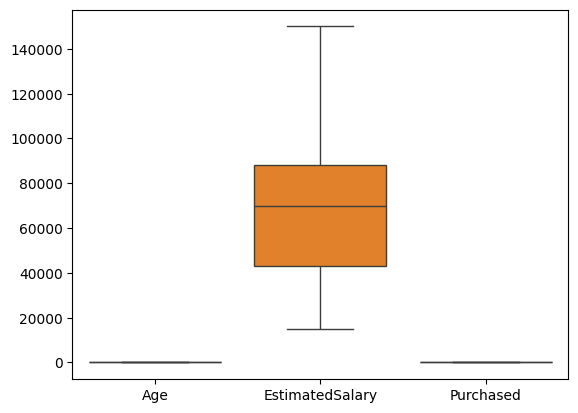

In [5]:
sns.boxplot(df)

In [ ]:
# No outliers present in the dataset.

Visualizing the distribution of each feature and the relationship with the target variable

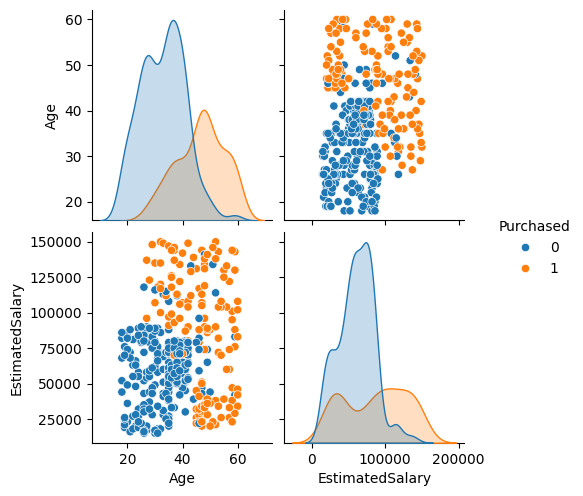

In [11]:
import matplotlib.pyplot as plt
sns.pairplot(df, hue='Purchased')
plt.show()

Encoding Gender variable so as the system can understand its significance

In [12]:
le=LabelEncoder()
df.Gender=le.fit_transform(df.Gender)

In [14]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


Split x and y

In [15]:
x=df.drop('Purchased',axis=1)
y=df.Purchased

Standard scaling

In [16]:
sc=StandardScaler()
x_sc=sc.fit_transform(x)

# Modelling

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x_sc,y,random_state=0,test_size=0.2)

KNN

In [18]:
knn=KNeighborsClassifier(n_neighbors=5,metric='euclidean').fit(x_train,y_train)
y_pred=knn.predict(x_test)
accuracy_score(y_test,y_pred)*100

95.0

SVM

In [19]:
svm=SVC(kernel='rbf').fit(x_train,y_train)
y_pred=svm.predict(x_test)
accuracy_score(y_test,y_pred)*100

95.0

Random Forest

In [20]:
rf=RandomForestClassifier(n_estimators=20,max_depth=20,criterion='gini',min_samples_split=3,random_state=0).fit(x_train,y_train)
y_pred=rf.predict(x_test)
accuracy_score(y_test,y_pred)*100

92.5

Decision Tree

In [22]:
dt=DecisionTreeClassifier(max_depth=50,criterion='gini',min_samples_leaf=5).fit(x_train,y_train)
y_pred=dt.predict(x_test)
accuracy_score(y_test,y_pred)*100

93.75

Logistic Regression

In [23]:
log_reg=LogisticRegression().fit(x_train,y_train)
y_pred=log_reg.predict(x_test)
accuracy_score(y_test,y_pred)*100

91.25

Got highest accuracy for KNN and SVM models. So use KNN model for web app creation.

Save KNN model and x by pickling

In [28]:
import pickle
with open('model.pkl','wb') as model_file:
  pickle.dump(knn,model_file)

In [29]:
import pickle
with open('x.pkl','wb') as x_file:
  pickle.dump(x,x_file)